In [1]:
import numpy as np
import matplotlib.pyplot as plt

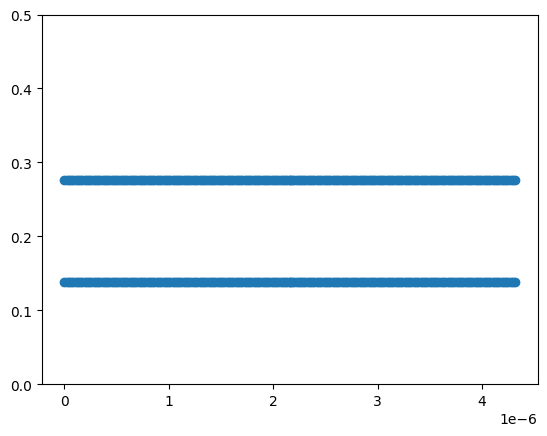

In [8]:
band_folder = "standard_cell_pbc/kronig_penney/length_9.96nm/bulkek.dat"
bands = np.loadtxt(band_folder)
plt.plot(bands[:, 0], bands[:, 1], 'o')
plt.ylim(0,0.5)
plt.show()

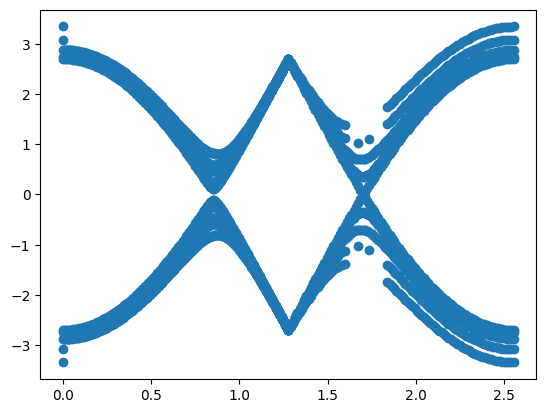

In [5]:
band_folder = "non_standard_cell_pbc/length_10nm/bulkek_fullBZ.dat"
bands = np.loadtxt(band_folder)
plt.plot(bands[:,0],bands[:,1],'o')
plt.show()

In [ ]:
band_folder = "non_standard_cell_pbc/length_10nm/bulkek.dat"
bands = np.loadtxt(band_folder)
plt.plot(bands[:,0],bands[:,1],'o')
plt.show()